In [1]:
import tensorflow as tf
import mitdeeplearning as mdl
import numpy as np
import matplotlib.pyplot as plt

In [24]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.414, tf.float64)

print("'sport' is a {}-d Tensor". format(tf.rank(sport).numpy()))
print("'number' is a {}-d Tensor".format(tf.rank(number).numpy()))


'sport' is a 0-d Tensor
'number' is a 0-d Tensor


In [25]:
#Create a 1 dimension tensor
sports = tf.constant(["Tennis", "Bastketball"], tf.string)
print("'sports' is a {}-d Tensor with shape {}".format(tf.rank(sports).numpy(), tf.shape(sports)))

'sports' is a 1-d Tensor with shape [2]


In [2]:
matrix = tf.constant([["Tennis", "Bastketball", "Baseball"]], tf.string)
assert isinstance(matrix, tf.Tensor)
assert tf.rank(matrix).numpy() == 2

In [3]:
images = tf.zeros([10,256,256,3])
assert isinstance(images, tf.Tensor)
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3]

In [28]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [29]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = a + b 
  d = b - 1
  e = c * d
  return e

In [30]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

6.0


In [31]:
### Defining a network Layer ###

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.matmul(x, self.W) + self.b 

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.2697859  0.45750418 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [32]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model 
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(3, activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)

In [33]:

# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: feed input into the model and predict the output!'''
model_output = model(x_input).numpy()
print(model_output)

[[0.5607363 0.6566898 0.1249697]]


In [34]:
### Defining a model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.''' 
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)

In [35]:

n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.6504887  0.47828162 0.8373661 ]], shape=(1, 3), dtype=float32)


In [36]:
### Defining a model using subclassing and specifying custom behavior ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  # As before, in __init__ we define the Model's layers
  # Since our desired behavior involves the forward pass, this part is unchanged
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  '''TODO: Implement the behavior where the network outputs the input, unchanged, 
      under control of the isidentity argument.'''
  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity:
        return input
    return x

In [37]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input) # TODO
# out_activate = # TODO
out_identity = model.call(x_input, isidentity=True) # TODO
# out_identity = # TODO

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

AttributeError: 'function' object has no attribute 'numpy'

In [38]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

Initializing x=[[-1.1771783]]


Text(0,0.5,'x value')

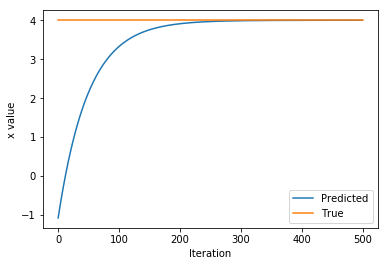

In [41]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x_f - x)**2

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')